<a href="https://colab.research.google.com/github/RvsL/kaggle/blob/main/eruptions_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Competition is about prediction of volcano eruption time
https://www.kaggle.com/c/predict-volcanic-eruptions-ingv-oe

  I've already created a model on LGBM with feature engeneering, it worked out 145 place in competition with MAE score around 5,2e6. First place is scored around 3e6, so i need to check different approach. Maybe First place guy knows much about the subject, and i don't. 

  This notebook aims to load data as a pictures and use deep learning to read volcano features right from pictures.

In [20]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import f1_score,recall_score,precision_score,roc_auc_score
from sklearn.model_selection import GridSearchCV, train_test_split


from sklearn.preprocessing import StandardScaler

from keras import regularizers as kreg
from keras.layers import Dense
from keras.models import Sequential

import os
from tqdm import tqdm_notebook
import scipy.fftpack
from scipy.signal import chirp, find_peaks, peak_widths, peak_prominences

import matplotlib.pyplot as plt


In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.4 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Conv2D, AveragePooling2D, MaxPooling2D, Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization

import glob
import os

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


In [ ]:
# %tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [12]:
import pickle

hdir = '/content/drive/MyDrive/2 - рабочее/32 - PMI/random/eruptions/'

for var in ['X_val', 'y_val', 'X_train', 'y_train']:
    
    with open(f'{hdir}{var}.pickle', 'rb') as handle:
        globals()[var] = pickle.load(handle)


In [13]:
X_train.shape

(3431, 300, 300, 3)

In [23]:
!pip install spektral

     |████████████████████████████████| 112kB 13.7MB/s 


In [47]:
from keras import layers
from keras import models


from spektral.layers import GCNConv


from keras.applications import VGG16

# conv_base = VGG16(weights='imagenet',
#                   include_top=False,
#                   input_shape=(300, 300, 3))

# model = models.Sequential()
# model.add(conv_base)
# model.add(layers.Flatten())
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dense(1))


# model = models.Sequential()
# model.add(GCNConv(32, activation='elu'))
# model.add(GCNConv(32, activation='elu', kernel_regularizer= kreg.l1(0.01)))
# model.add(layers.Flatten())
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dense(1))

window = 1

model = models.Sequential()
model.add(layers.Conv2D(32, (window, window), activation='relu',
                        input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (window, window), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (window, window), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (window, window), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='linear'))


model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 300, 300, 32)      128       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 150, 150, 64)      2112      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 75, 75, 128)       8320      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 37, 37, 128)     

In [49]:
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=4)

Epoch 1/50
858/858 [==============================] - 8s 8ms/step - loss: 186201962996465.4062 - mae: 11685545.8789 - val_loss: 676373395931136.0000 - val_mae: 22297132.0000
Epoch 2/50
858/858 [==============================] - 7s 8ms/step - loss: 186926613845803.8125 - mae: 11752401.5023 - val_loss: 676325144657920.0000 - val_mae: 22296060.0000
Epoch 3/50
858/858 [==============================] - 7s 8ms/step - loss: 186273717186421.7188 - mae: 11665600.1769 - val_loss: 675505476993024.0000 - val_mae: 22277816.0000
Epoch 4/50
858/858 [==============================] - 13s 15ms/step - loss: 190047569094982.6250 - mae: 11822346.8452 - val_loss: 675884373639168.0000 - val_mae: 22286242.0000
Epoch 5/50
858/858 [==============================] - 7s 8ms/step - loss: 188898494270386.5000 - mae: 11779121.9884 - val_loss: 676587674533888.0000 - val_mae: 22301884.0000
Epoch 6/50
858/858 [==============================] - 7s 8ms/step - loss: 187200531222952.3750 - mae: 11735650.6077 - val_loss: 

KeyboardInterrupt: ignored

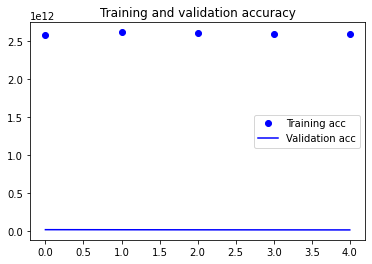

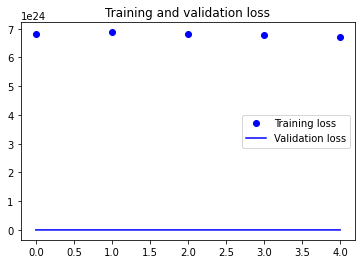

In [21]:
acc = history.history['mae']
val_acc = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [22]:
y_pred = model.predict(X_test).ravel()

NameError: ignored

In [ ]:
res = pd.DataFrame({
    'y':y_test,
    'preds':y_pred})
res['diff'] = abs(res['preds'] - res['y'])
res['err'] = res['diff']/res['y']
res.sort_values(by = 'preds', inplace = True)
res.reset_index(inplace = True)
res['index'] = res.index

lmetric = mean_absolute_error(y_test, y_pred)
print('The MAE of prediction is:', lmetric)

fig = plt.figure(figsize=(19, 4))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
ax1.hist(y_train, bins=25)
ax1.set_title('train labels')

ax2.hist(y_test, bins=25)
ax2.set_title('test labels')

ax3.hist(y_pred, bins=25)
ax3.set_title('Predictions')

plt.show()


plt.figure(figsize = (15,5))
plt.plot(res['index'], res['y'], 'o-b', label = 'true labels')
plt.plot(res['index'], res['preds'], 'o-g', label = 'predictions')

plt.title('Prediction Power')
plt.xlabel('Measurement')
plt.ylabel('Delta Magnitude')
plt.legend(['true','preds'])